#PROBLEM STATEMENT

Food waste is a massive problem.About 40% of the food produced is wasted every year.
One of the most common occurrences leading to food wastage is due to overflowing plates and food that ultimately goes into trash cans,be it buffet spreads or individual orders.

#SOLUTION STATEMENT

A regression modal predicting how much a perticular person should consume according to his daily food consuming habits and data features like age, height, weight etc in order to determine the quntity of food required by the person so that food is not wasted at eateries and cafe's.

#DATA DECRIPTION
The dataset contains information about daily food quantities required by a person and physical parameters of that person.

Data was collected via Google forms.

The dataset contains 482 rows and has following 14 Data features -



1.Timestamp (Catagorical)

2.Name(Catagorical)

3.Gender(Numeric)

4.Age(in years)(Numeric)

5.Height(in cm) (Numeric)

6.Weight(in kgs) (Numeric)

7.Health Issues(if any)(Catagorical)

8.How many servinngs of rice do you eat at a restaurant (Numeric)

9.How many bowls of vegetables you eat(Numeric)

10.How many slices of pizzaould you prefer in restaurants	How many burgers would you  (Numeric)

11.How many burgers would you prefer(Numeric)

12.How many beverages would you consume in a eatery?(Numeric)

13.How many pieces of meat you are likely to consume?(Numeric)

14.How much quantity of sea food would you prefer in hotels?(Numeric)



In [134]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [135]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [136]:
df=pd.read_csv('/content/drive/MyDrive/Intel AI mentorship 2021/Hunger Crisis 1.csv')

In [137]:
df=df.copy()

In [138]:
df.head(10)

,Timestamp,Name,Gender,Age (in years),Height (in cm),Weight (in kg),Health Issues (if any),How many servings of rice you eat at a restaurants,How many bowls of vegetables you eat,How many slices of pizza would you prefer in restaurants,How many burgers would you prefer,How many beverages would you consume in a eatery?,How many pieces of meat you are likely to consume?,How much quantity of sea food would you prefer in hotels?
0,17/07/2021 17:03:58,Samridh Nagpal,Male,15,170.0,47.0,NaN,1,2,4,1,1,2,1
1,17/07/2021 17:07:38,Anonymous,Female,14,167.0,49.0,NaN,2,2,3,2,2,0,0
2,17/07/2021 17:07:53,Sachit Bansal,Male,15,173.0,61.0,NaN,1,2,4,4,2,2,1
3,17/07/2021 17:12:08,Ishita,Female,16,163.0,44.0,NaN,0,2,5,1,3,3,2
4,17/07/2021 17:14:05,Harleen,Female,15,168.0,41.0,NaN,1,1,3,1,1,1,NaN
5,17/07/2021 17:15:34,Karan Hindocha,Male,26,173.0,72.0,NaN,1,2,2,1,2,4,2
6,17/07/2021 17:16:07,Abhyuday Gandhi,Male,15,163.0,70.0,NaN,1,1,5,2,1,2,1
7,17/07/2021 17:18:15,Krishang,Male,15,165.0,42.0,NaN,1,1,4,1,1,NaN,NaN
8,17/07/2021 17:18:16,NaN,Female,15,157.0,61.0,NaN,2,NaN,2,1,1,0,0
9,17/07/2021 17:28:48,Nehal Goel,Female,15,162.0,48.0,NaN,NaN,1,4,2,1,1,NaN


#Explotratory Data Analysis

In [139]:
df.size

6748

In [140]:
df.shape

(482, 14)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Timestamp                                                  482 non-null    object 
 1   Name                                                       468 non-null    object 
 2   Gender                                                     482 non-null    object 
 3   Age (in years)                                             482 non-null    int64  
 4   Height (in cm)                                             482 non-null    float64
 5   Weight (in kg)                                             482 non-null    float64
 6   Health Issues (if any)                                     79 non-null     object 
 7   How many servings of rice you eat at a restaurants         472 non-null    object 
 8   How many b

In [142]:
df.describe()

,Age (in years),Height (in cm),Weight (in kg)
count,482.000000,482.000000,482.000000
mean,27.143154,163.826411,62.620768
std,15.123272,19.253955,27.718724
min,7.000000,90.000000,18.000000
25%,14.000000,156.000000,50.125000
50%,20.000000,164.000000,61.000000
75%,40.000000,170.000000,71.750000
max,75.000000,500.000000,580.000000


In [143]:
df.columns

Index(['Timestamp', 'Name', 'Gender', 'Age (in years)', 'Height (in cm) ',
       'Weight (in kg)', 'Health Issues (if any)',
       'How many servings of rice you eat at a restaurants',
       'How many bowls of vegetables you eat',
       'How many slices of pizza would you prefer in restaurants',
       'How many burgers would you prefer',
       'How many beverages would you consume in a eatery?',
       'How many pieces of meat you are likely to consume?',
       'How much quantity of sea food would you prefer in hotels?'],
      dtype='object')

In [144]:
df.isnull().sum()

Timestamp                                                      0
Name                                                          14
Gender                                                         0
Age (in years)                                                 0
Height (in cm)                                                 0
Weight (in kg)                                                 0
Health Issues (if any)                                       403
How many servings of rice you eat at a restaurants            10
How many bowls of vegetables you eat                           6
How many slices of pizza would you prefer in restaurants       6
How many burgers would you prefer                              9
How many beverages would you consume in a eatery?             11
How many pieces of meat you are likely to consume?            42
How much quantity of sea food would you prefer in hotels?     52
dtype: int64

In [145]:
np.unique(df['Gender'])

array(['Female', 'Male', 'Other'], dtype=object)

In [146]:
df.nunique(axis=0,dropna=True)

Timestamp                                                    482
Name                                                         450
Gender                                                         3
Age (in years)                                                61
Height (in cm)                                                71
Weight (in kg)                                                81
Health Issues (if any)                                         5
How many servings of rice you eat at a restaurants            19
How many bowls of vegetables you eat                          11
How many slices of pizza would you prefer in restaurants      18
How many burgers would you prefer                             18
How many beverages would you consume in a eatery?             17
How many pieces of meat you are likely to consume?            66
How much quantity of sea food would you prefer in hotels?     71
dtype: int64

In [147]:
df.value_counts('Gender')

Gender
Female    282
Male      199
Other       1
dtype: int64

#Data Preprocessing And Cleaning



In [148]:
df.drop(['Timestamp','Name'],axis=1,inplace=True)

In [149]:
df['Health Issues (if any)']=df['Health Issues (if any)'].fillna(0)


In [150]:
df

,Gender,Age (in years),Height (in cm),Weight (in kg),Health Issues (if any),How many servings of rice you eat at a restaurants,How many bowls of vegetables you eat,How many slices of pizza would you prefer in restaurants,How many burgers would you prefer,How many beverages would you consume in a eatery?,How many pieces of meat you are likely to consume?,How much quantity of sea food would you prefer in hotels?
0,Male,15,170.00,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.00,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.00,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.00,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.00,41.0,0,1,1,3,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Male,48,167.74,73.0,0,1,2,NaN,1,1,NaN,NaN
478,Male,14,173.00,58.0,0,1,1,4,2,0,2,1
479,Male,14,173.00,68.0,0,1,1,1,1,1,0,0
480,Male,13,155.00,49.0,0,1,1,4,1,1,NaN,NaN


In [151]:
def rename(df,new_columns):
  df.columns=new_columns
  return df
rename(df,['Gender', 'Age', 'Height',
       'Weight', 'Diseases','rice',
       'vegetables',
       'pizza',
       'burgers',
       'beverages',
       'meat',
       'sea_food'])

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.00,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.00,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.00,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.00,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.00,41.0,0,1,1,3,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Male,48,167.74,73.0,0,1,2,NaN,1,1,NaN,NaN
478,Male,14,173.00,58.0,0,1,1,4,2,0,2,1
479,Male,14,173.00,68.0,0,1,1,1,1,1,0,0
480,Male,13,155.00,49.0,0,1,1,4,1,1,NaN,NaN


In [152]:
df.loc[(df.Diseases=='Diabetes'),'Diseases']=1

In [153]:
df.loc[(df.Diseases=='High Cholestrol'),'Diseases']=2


In [154]:
df.loc[(df.Diseases=='Acidity'),'Diseases']=3

In [155]:
df.loc[(df.Diseases=='Hypertension'),'Diseases']=4

In [156]:
df.loc[(df.Diseases=='Increased Uric Acid'),'Diseases']=5

In [157]:
df.head(20)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,NaN
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,NaN,NaN
8,Female,15,157.0,61.0,0,2,NaN,2,1,1,0,0
9,Female,15,162.0,48.0,0,NaN,1,4,2,1,1,NaN


In [158]:
df['meat']=pd.to_numeric(df.meat.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [159]:
df.head(50)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,NaN
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,0,NaN
8,Female,15,157.0,61.0,0,2,NaN,2,1,1,0,0
9,Female,15,162.0,48.0,0,NaN,1,4,2,1,1,NaN


In [160]:
df.head(10)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,NaN
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,0,NaN
8,Female,15,157.0,61.0,0,2,NaN,2,1,1,0,0
9,Female,15,162.0,48.0,0,NaN,1,4,2,1,1,NaN


In [161]:
df.tail(10)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
472,Male,13,165.00,42.0,0,1,1,3,2,1,2,1
473,Female,41,170.00,73.0,4,1,1,3,1,1,2,1
474,Female,14,157.00,55.0,0,1,1,3,1,1,0,I am a vegetarian
475,Female,23,148.00,53.0,0,1,1,1,1,None,0,Not any
476,Female,49,160.00,65.0,0,1,1,4,1,1,0,vegetarian person
477,Male,48,167.74,73.0,0,1,2,NaN,1,1,0,NaN
478,Male,14,173.00,58.0,0,1,1,4,2,0,2,1
479,Male,14,173.00,68.0,0,1,1,1,1,1,0,0
480,Male,13,155.00,49.0,0,1,1,4,1,1,0,NaN
481,Other,21,160.00,78.0,0,1,2,3,1,1,2,2


In [162]:
df['meat']=df['meat'].fillna(0)

In [163]:
df.head(10)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,NaN
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,0,NaN
8,Female,15,157.0,61.0,0,2,NaN,2,1,1,0,0
9,Female,15,162.0,48.0,0,NaN,1,4,2,1,1,NaN


In [164]:
df['sea_food']=df['sea_food'].fillna(0)

In [165]:
df['sea_food']=pd.to_numeric(df.sea_food.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [166]:
df['beverages']=df['beverages'].fillna(0)

In [167]:
df['beverages']=pd.to_numeric(df.beverages.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [168]:
df.head(50)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,0
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,0,0
8,Female,15,157.0,61.0,0,2,NaN,2,1,1,0,0
9,Female,15,162.0,48.0,0,NaN,1,4,2,1,1,0


In [169]:
df['burgers']=pd.to_numeric(df.burgers.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [170]:
df['pizza']=df['pizza'].fillna(0)

In [171]:
df['pizza']=pd.to_numeric(df.pizza.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [172]:
df['vegetables']=pd.to_numeric(df.vegetables.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [173]:
df['vegetables']=df['vegetables'].fillna(0)

In [174]:
df['rice']=pd.to_numeric(df.rice.astype(str).str.replace(',',''),errors='coerce').fillna(0).astype(int)

In [175]:
df['rice']=df['rice'].fillna(0)

In [176]:
df.head(20)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,Male,15,170.0,47.0,0,1,2,4,1,1,2,1
1,Female,14,167.0,49.0,0,2,2,3,2,2,0,0
2,Male,15,173.0,61.0,0,1,2,4,4,2,2,1
3,Female,16,163.0,44.0,0,0,2,5,1,3,3,2
4,Female,15,168.0,41.0,0,1,1,3,1,1,1,0
5,Male,26,173.0,72.0,0,1,2,2,1,2,4,2
6,Male,15,163.0,70.0,0,1,1,5,2,1,2,1
7,Male,15,165.0,42.0,0,1,1,4,1,1,0,0
8,Female,15,157.0,61.0,0,2,0,2,1,1,0,0
9,Female,15,162.0,48.0,0,0,1,4,2,1,1,0


In [177]:
df.tail(20)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
462,Male,14,168.00,60.0,0,0,2,6,2,1,2,0
463,Female,23,163.00,52.0,0,2,1,3,1,2,1,1
464,Male,24,176.00,73.0,0,1,1,3,1,1,4,1
465,Female,66,155.00,68.0,1,2,2,2,1,1,0,0
466,Male,14,157.50,60.0,0,0,2,4,1,0,0,0
467,Male,14,160.00,50.0,0,1,1,2,1,1,0,0
468,Female,14,156.00,52.0,0,1,1,2,1,1,0,0
469,Female,21,156.00,50.0,0,1,1,3,1,1,1,0
470,Female,13,153.00,48.0,0,1,2,4,2,1,2,2
471,Female,60,159.00,76.0,0,0,0,1,0,2,0,0


In [178]:
df.corr()

,Age,Height,Weight,rice,vegetables,pizza,burgers,beverages,meat,sea_food
Age,1.000000,0.074961,3.110703e-01,0.033253,5.867198e-02,-0.384196,-0.285815,-0.210494,-0.128024,-0.106457
Height,0.074961,1.000000,1.407726e-01,0.004543,3.919646e-03,0.043457,0.043698,0.051950,0.085304,0.018033
Weight,0.311070,0.140773,1.000000e+00,-0.018104,-5.718076e-07,-0.122559,-0.076823,-0.113668,-0.030743,-0.016685
rice,0.033253,0.004543,-1.810409e-02,1.000000,4.428691e-01,0.092341,0.071499,0.087602,0.091681,0.072249
vegetables,0.058672,0.003920,-5.718076e-07,0.442869,1.000000e+00,0.098681,0.052610,0.026858,0.000114,0.007616
pizza,-0.384196,0.043457,-1.225592e-01,0.092341,9.868051e-02,1.000000,0.533023,0.257945,0.148751,0.175833
burgers,-0.285815,0.043698,-7.682300e-02,0.071499,5.261017e-02,0.533023,1.000000,0.299590,0.162840,0.202175
beverages,-0.210494,0.051950,-1.136683e-01,0.087602,2.685798e-02,0.257945,0.299590,1.000000,0.177376,0.171116
meat,-0.128024,0.085304,-3.074348e-02,0.091681,1.139920e-04,0.148751,0.162840,0.177376,1.000000,0.624572
sea_food,-0.106457,0.018033,-1.668503e-02,0.072249,7.616323e-03,0.175833,0.202175,0.171116,0.624572,1.000000


#DATA VISULAISATION

Visualising and analying data pictorally via:

1.heatmap

2.histogram

3.scatter plot

4.box plots

5.pie charts

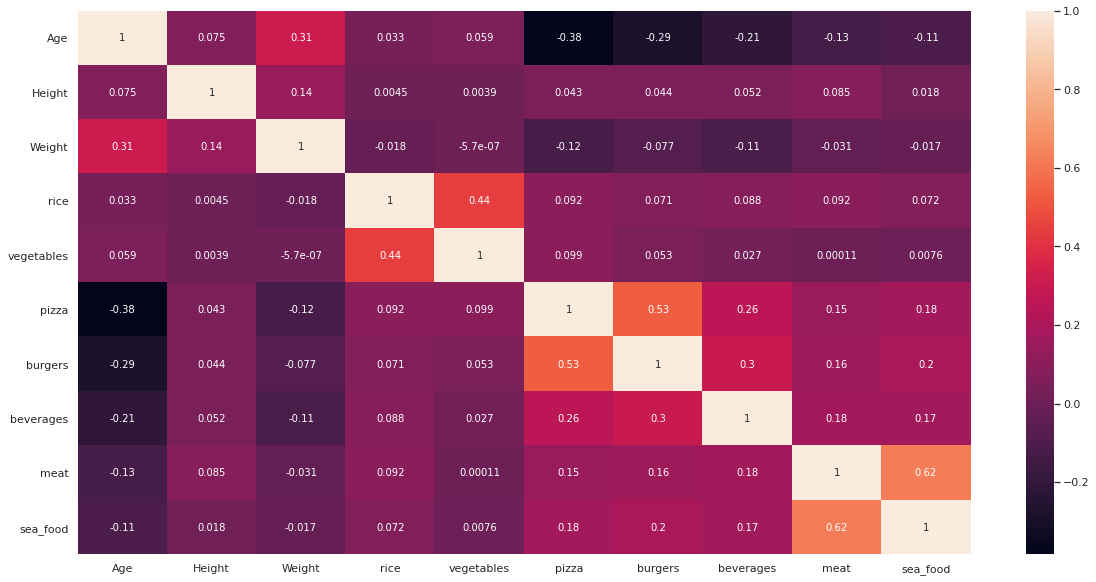

In [179]:
import seaborn as sns
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,annot=True)
sns.color_palette("mako", as_cmap=True)

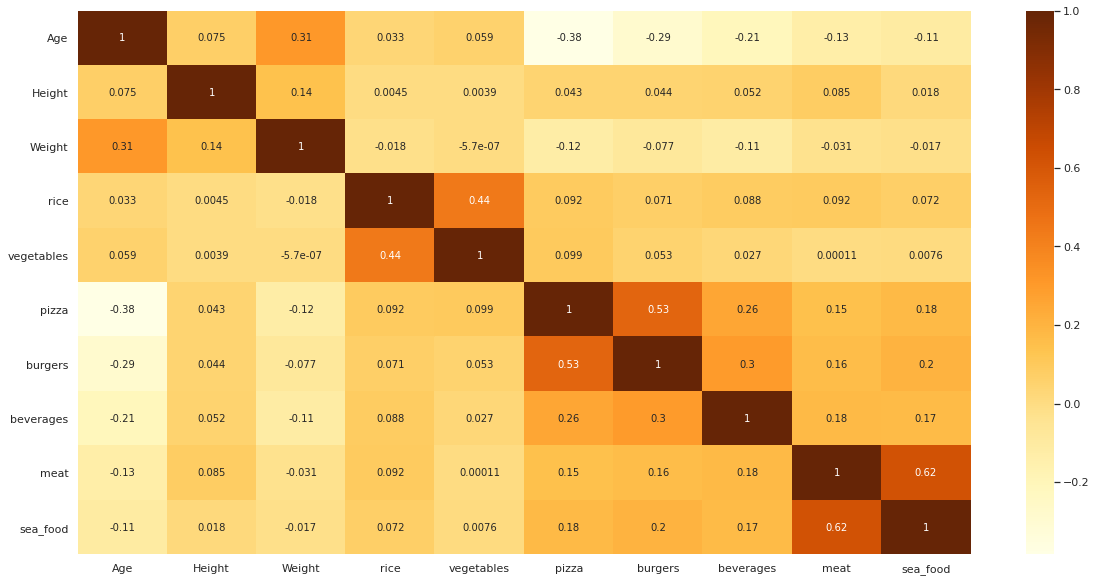

In [180]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap='YlOrBr',annot=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age vs Diseases')

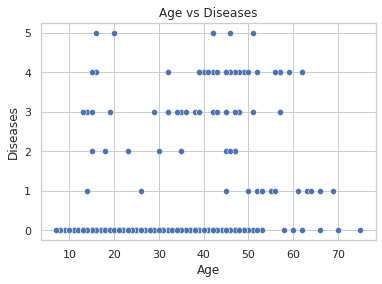

In [181]:
sns.scatterplot( df['Age'], df['Diseases'])
sns.set(style='whitegrid',)
plt.title('Age vs Diseases')

<Figure size 1440x3600 with 0 Axes>

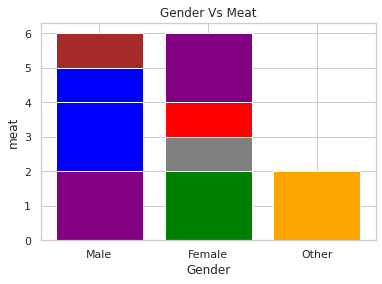

<Figure size 1440x3600 with 0 Axes>

In [182]:
plt.bar(df['Gender'],df['meat'], color=['red','orange','yellow','green','blue','brown','gray','cyan','purple','pink'])
plt.ylabel('meat')
plt.xlabel('Gender')
plt.title('Gender Vs Meat')
plt.figure(2,figsize=(20, 50))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


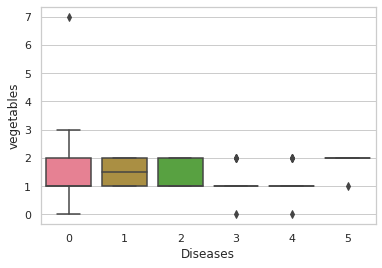

In [183]:
sns.boxplot( df['Diseases'], df['vegetables'],palette='husl')

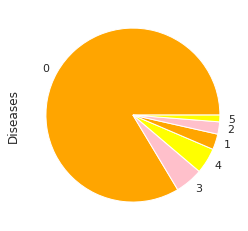

In [184]:
df['Diseases'].value_counts().plot(kind='pie', colors=['orange','pink','yellow'])

In [185]:
from sklearn import preprocessing

In [186]:
le=preprocessing.LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [187]:
df.head(50)

,Gender,Age,Height,Weight,Diseases,rice,vegetables,pizza,burgers,beverages,meat,sea_food
0,1,15,170.0,47.0,0,1,2,4,1,1,2,1
1,0,14,167.0,49.0,0,2,2,3,2,2,0,0
2,1,15,173.0,61.0,0,1,2,4,4,2,2,1
3,0,16,163.0,44.0,0,0,2,5,1,3,3,2
4,0,15,168.0,41.0,0,1,1,3,1,1,1,0
5,1,26,173.0,72.0,0,1,2,2,1,2,4,2
6,1,15,163.0,70.0,0,1,1,5,2,1,2,1
7,1,15,165.0,42.0,0,1,1,4,1,1,0,0
8,0,15,157.0,61.0,0,2,0,2,1,1,0,0
9,0,15,162.0,48.0,0,0,1,4,2,1,1,0


In [188]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Diseases', 'rice', 'vegetables',
       'pizza', 'burgers', 'beverages', 'meat', 'sea_food'],
      dtype='object')

In [189]:
X=df[['Gender', 'Age', 'Height', 'Weight', 'Diseases']].values
X

array([[1, 15, 170.0, 47.0, 0],
       [0, 14, 167.0, 49.0, 0],
       [1, 15, 173.0, 61.0, 0],
       ...,
       [1, 14, 173.0, 68.0, 0],
       [1, 13, 155.0, 49.0, 0],
       [2, 21, 160.0, 78.0, 0]], dtype=object)

In [190]:
y_rice=df['rice'].values
y_rice

array([ 1,  2,  1,  0,  1,  1,  1,  1,  2,  0,  1,  0,  1,  1,  1,  2,  1,
        1,  1,  1,  2,  1,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,
        1,  1,  1,  0,  1,  1,  1,  1,  2,  1,  1,  1,  1,  0,  3,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  2,  1,  2,  0,  1,  1,  2,  1,  1,  0,  0,  1,  1,  0,
        1,  1,  2,  0,  2,  1,  1,  1,  0,  1,  1,  0,  2,  2,  1,  1,  2,
        3,  1,  1,  1,  1,  1,  1,  1,  2,  0,  1,  2,  0,  1,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  2,  1,  1,  0,  1,  0, 10,  1,  0,  0,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  1,  1,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  1

In [191]:
y_vegetables=df['vegetables'].values
y_vegetables

array([2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 7, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

In [192]:
y_pizza=df['pizza'].values
y_pizza

array([ 4,  3,  4,  5,  3,  2,  5,  4,  2,  4,  4,  4,  4,  3,  3,  3,  3,
        1,  0,  4,  4,  4,  2,  6,  4,  5,  3,  3,  3,  3,  1,  0,  3,  3,
        2,  4,  4,  0,  3,  3,  2,  3,  3,  4,  3,  3,  3,  0,  3,  4,  3,
        4,  5,  3,  4,  4,  3,  4,  4,  3,  2,  2,  7,  4,  3,  5,  3,  3,
        2,  4,  0,  2,  4,  2,  4,  3,  2,  1,  3,  4,  4,  1,  1,  3,  1,
        2,  3,  4,  2,  4,  1,  4,  2,  4,  2,  3,  4,  3,  4,  4,  3,  3,
        3,  4,  1,  2,  3,  4,  4,  3,  1,  3,  5,  3,  3,  3,  3,  3,  3,
        3,  4,  2,  4,  3,  3,  3,  2,  3,  6,  0,  3,  4,  4,  3,  3,  7,
        2,  3,  3,  2,  4,  4,  3,  0,  2,  3,  3,  2,  3,  3,  0,  3,  3,
        2,  3,  4,  4,  3,  2,  3,  4,  4,  1,  4,  3,  2,  3,  0,  4,  4,
        3,  4,  4,  0,  3,  3,  7,  3,  3,  4,  1,  3,  2,  0,  3,  2,  4,
        3,  4,  4,  1,  2,  3,  4,  2,  3,  3,  3,  6,  3,  3,  4,  6,  3,
        4,  0,  4,  4,  2,  2,  4,  3,  2,  4,  2,  3,  3,  2,  2,  3,  4,
        4,  2,  6,  0,  3

In [193]:
y_burgers=df['burgers'].values
y_burgers

array([1, 2, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1,

In [194]:
y_beverages=df['beverages'].values
y_beverages

array([1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 3, 2, 4, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [195]:
y_meat=df['meat'].values
y_meat

array([2, 0, 2, 3, 1, 4, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 3, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 0, 2, 3, 0, 2, 2, 0, 4, 0, 0, 3, 0, 2, 0, 0, 4, 4, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 3, 2, 2, 0, 6, 1, 0, 0, 0, 3, 0, 3, 2, 0,
       0, 3, 0, 0, 0, 1, 0, 1, 2, 4, 0, 2, 2, 2, 0, 3, 0, 2, 2, 4, 0, 0,
       0, 0, 3, 1, 0, 4, 3, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 2, 0, 3, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 6,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 5, 0, 1, 0, 2,
       0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 4, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0,
       3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,

In [196]:
y_sea_food=df['sea_food'].values
y_sea_food

array([ 1,  0,  1,  2,  0,  2,  1,  0,  0,  0,  1,  2,  0,  0,  1,  2,  0,
        2,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        2,  0,  0,  2,  0,  0,  1,  0,  1,  0,  0,  1,  2,  0,  0,  0,  0,
        1,  0,  1,  0,  0,  0,  1,  2,  1,  0, 10,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  2,  0,  1,  1,  1,
        0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  2,  1,  0,  1,  1,  0,  1,
        0,  2,  1,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  1,  0,  4,
        0,  2,  2,  0,  1,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  1,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  2,  0,  1,  0,  2,  0,  0,  0,  1,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  1,  0,  0,  0

In [197]:
X.shape

(482, 5)

In [198]:
y_burgers.shape

(482,)

In [199]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [200]:
X=ss.fit_transform(X)
X

array([[ 1.17241186, -0.8037791 ,  0.32097318, -0.5641312 , -0.40450353],
       [-0.83862912, -0.86997105,  0.16499916, -0.49190284, -0.40450353],
       [ 1.17241186, -0.8037791 ,  0.47694721, -0.05853269, -0.40450353],
       ...,
       [ 1.17241186, -0.86997105,  0.47694721,  0.19426656, -0.40450353],
       [ 1.17241186, -0.93616301, -0.45889693, -0.49190284, -0.40450353],
       [ 3.18345284, -0.40662735, -0.19894023,  0.55540835, -0.40450353]])

In [201]:
from sklearn import preprocessing 
X=preprocessing.normalize(X)
X

array([[ 0.72633096, -0.4979561 ,  0.19884886, -0.34948977, -0.25059746],
       [-0.60953505, -0.63231509,  0.11992521, -0.35752637, -0.29400252],
       [ 0.75441308, -0.51720857,  0.30690171, -0.03766409, -0.2602863 ],
       ...,
       [ 0.732723  , -0.54370638,  0.29807801,  0.1214109 , -0.25280283],
       [ 0.69239929, -0.55287619, -0.2710139 , -0.29050642, -0.23889041],
       [ 0.96818315, -0.12366753, -0.06050367,  0.16891628, -0.12302161]])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_rice_train, y_rice_test=train_test_split(X,y_rice, test_size=0.2, random_state=0)

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_vegetables_train, y_vegetables_test=train_test_split(X,y_vegetables, test_size=0.2, random_state=0)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_pizza_train, y_pizza_test=train_test_split(X,y_pizza, test_size=0.2, random_state=0)

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_burgers_train, y_burgers_test=train_test_split(X,y_burgers, test_size=0.2, random_state=0)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_beverages_train, y_beverages_test=train_test_split(X,y_beverages, test_size=0.2, random_state=0)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_meat_train, y_meat_test=train_test_split(X,y_meat, test_size=0.2, random_state=0)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_sea_food_train, y_sea_food_test=train_test_split(X,y_sea_food, test_size=0.2, random_state=0)

In [209]:
from sklearn.svm import SVR 
regressor=SVR(kernel='rbf')

In [210]:
regressor.fit(X_train, y_rice_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [211]:
y_rice_predict=regressor.predict(X_test)

In [212]:
y_rice_predict

array([0.98524395, 0.90271919, 0.92917421, 1.02199858, 0.90563972,
       1.05319477, 1.07640438, 1.1230595 , 1.05120341, 1.13637699,
       1.03564536, 1.12901694, 1.08342969, 0.975499  , 1.08194851,
       0.92304537, 1.09315845, 1.00802299, 1.06017283, 0.82195987,
       0.90325908, 1.02907765, 1.04931753, 0.8677154 , 0.90698213,
       0.89925928, 0.90568528, 1.06191528, 0.98167638, 0.89980195,
       0.92588945, 0.93100437, 1.03517406, 1.05340941, 1.09598618,
       0.78630797, 1.07415293, 1.10635089, 0.91150758, 1.08179816,
       1.08438962, 0.9293035 , 1.25673264, 1.02981208, 0.97918159,
       0.99229986, 1.1008693 , 1.09767039, 0.94193179, 1.09407162,
       1.01858409, 0.90428294, 1.07908765, 0.93564526, 1.19244478,
       1.0939644 , 0.93743056, 1.27142441, 0.92783059, 1.07786842,
       1.08786472, 1.10038002, 1.09053398, 1.20024726, 0.99460434,
       0.92685182, 1.0794564 , 0.94786427, 1.00045506, 1.02645457,
       0.94886326, 1.04429472, 0.95863092, 0.96057   , 0.98324

In [213]:
y_rice_train

array([ 1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  1,  1,
        0,  2,  0,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  2,  1,  1,  0,  1,  2,  0,  1,  2,  1,  1,  1,  0,  1,  1,  1,
        0,  1,  2,  1,  2,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        2,  0,  1,  1,  1,  1,  1,  2,  1,  0,  2,  0,  1,  1,  1,  1,  1,
        0,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  1,  1,  0,  1,
        1,  2,  0,  0,  1,  2,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  0,  1,  1,  1,  1,
        1,  1, 10,  0,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  3,  0,  1,  1,  1,  1,  1,  1,  2,
        1,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  2,  2,  2,  1,  0,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  2,  1,  2,  1,  1,  1,  2,  1,
        1,  2,  1,  2,  2,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0

In [214]:
y_vegetables_train

array([1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 7, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,

In [215]:
from sklearn import metrics
metrics.mean_squared_error(y_rice_test, y_rice_predict)

0.32048699083309484

In [216]:
regressor.fit(X_train, y_vegetables_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [217]:
y_vegetables_predict=regressor.predict(X_test)

In [218]:
y_vegetables_predict

array([1.09789163, 1.1390273 , 1.10072053, 1.10284327, 1.08793918,
       1.09764221, 1.10331388, 1.08152729, 1.08440748, 1.11324962,
       1.09616153, 1.15929894, 1.09918571, 1.10048148, 1.09848038,
       1.03471191, 1.10405043, 1.10328163, 1.10130823, 1.0740652 ,
       1.09992774, 1.09807532, 1.09377249, 1.03158127, 1.09829456,
       1.09965247, 1.09959607, 1.10127407, 1.10102616, 1.09935821,
       1.09717191, 1.10088579, 1.10230495, 1.09687188, 1.17003063,
       1.06200572, 1.09855252, 1.05780738, 1.099884  , 1.08063559,
       1.13601072, 1.10148839, 1.46033563, 0.99984292, 1.09880461,
       1.09555384, 1.10111657, 1.15344636, 1.09690364, 1.2303344 ,
       1.09625427, 1.0328971 , 1.07886812, 1.09988981, 1.18541356,
       1.0696679 , 1.1011175 , 1.41620536, 1.09870054, 1.09982998,
       1.07310467, 1.08704858, 1.11055472, 1.09853911, 1.10159217,
       1.09749837, 1.14720718, 1.10154761, 1.06101504, 1.09238425,
       1.18984569, 1.09842418, 1.09408059, 1.10321   , 1.21055

In [219]:
from sklearn import metrics
metrics.mean_squared_error(y_vegetables_test, y_vegetables_predict)

0.2718478626727733

In [220]:
regressor.fit(X_train, y_pizza_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [221]:
y_pizza_predict=regressor.predict(X_test)

In [222]:
from sklearn import metrics
metrics.mean_absolute_error(y_pizza_test, y_pizza_predict)


0.7647425234864177

In [223]:
regressor.fit(X_train, y_burgers_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [224]:
y_burgers_predict=regressor.predict(X_test)

In [225]:
from sklearn import metrics
metrics.mean_absolute_error(y_burgers_test, y_burgers_predict)

0.3191591927273082

In [226]:
regressor.fit(X_train, y_beverages_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [227]:
y_beverages_predict=regressor.predict(X_test)

In [228]:
from sklearn import metrics
metrics.mean_absolute_error(y_beverages_test, y_beverages_predict)

0.4085101312387626

In [229]:
regressor.fit(X_train, y_meat_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [230]:
y_meat_predict=regressor.predict(X_test)

In [231]:
from sklearn import metrics
metrics.mean_absolute_error(y_meat_test, y_meat_predict)

0.974140738587926

In [232]:
regressor.fit(X_train, y_sea_food_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [233]:
y_sea_food_predict=regressor.predict(X_test)

In [234]:
from sklearn import metrics
metrics.mean_absolute_error(y_sea_food_test, y_sea_food_predict)

0.5892334037837386